<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-data-from-file" data-toc-modified-id="Reading-data-from-file-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading data from file</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Calculations-and-adding-results-to-the-table" data-toc-modified-id="Calculations-and-adding-results-to-the-table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculations and adding results to the table</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Studying-the-following-parameters:-area,-price,-number-of-rooms,-height-of-ceilings.-Plotting-histograms" data-toc-modified-id="Studying-the-following-parameters:-area,-price,-number-of-rooms,-height-of-ceilings.-Plotting-histograms-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Studying the following parameters: area, price, number of rooms, height of ceilings. Plotting histograms</a></span></li><li><span><a href="#Studying-the-duration-of-the-flat-being-sold" data-toc-modified-id="Studying-the-duration-of-the-flat-being-sold-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Studying the duration of the flat being sold</a></span></li><li><span><a href="#Removing-rare-and-outlying-values" data-toc-modified-id="Removing-rare-and-outlying-values-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Removing rare and outlying values</a></span></li><li><span><a href="#Assessing-the-various-factors-that-influence-the-price-of-a-flat" data-toc-modified-id="Assessing-the-various-factors-that-influence-the-price-of-a-flat-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Assessing the various factors that influence the price of a flat</a></span></li><li><span><a href="#Analysis-of-localities-with-the-highest-number-of-advertisements" data-toc-modified-id="Analysis-of-localities-with-the-highest-number-of-advertisements-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Analysis of localities with the highest number of advertisements</a></span></li><li><span><a href="#Analysis-of-flat-prices-based-on-their-distance-to-the-city-centre" data-toc-modified-id="Analysis-of-flat-prices-based-on-their-distance-to-the-city-centre-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Analysis of flat prices based on their distance to the city centre</a></span></li><li><span><a href="#Analysis-of-flats-in-the-centre.-Study-of-parameters:-area,-price,-number-of-rooms,-ceiling-height" data-toc-modified-id="Analysis-of-flats-in-the-centre.-Study-of-parameters:-area,-price,-number-of-rooms,-ceiling-height-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Analysis of flats in the centre. Study of parameters: area, price, number of rooms, ceiling height</a></span></li><li><span><a href="#Exploratory-analysis.-Conclusion:" data-toc-modified-id="Exploratory-analysis.-Conclusion:-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Exploratory analysis. Conclusion:</a></span></li></ul></li><li><span><a href="#Overall-conclusion" data-toc-modified-id="Overall-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Overall conclusion</a></span></li></ul></div>

# Research on flat on sale advertisements

We have at our disposal data from Yandex Real Estate - an archive of advertisements for flats for sale in St. Petersburg and neighbouring localities for several years. We need to learn how to determine the market value of properties. Our task is to set the parameters. This will allow building an automated system: it will track anomalies and fraudulent activities. 

Two types of data are available for each flat for sale. The first one is entered by the user; the second one is automatically obtained on the basis of cartographic data. For example, the distance to the centre, airport, nearest park and pond.

## Reading data from file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install --upgrade seaborn 

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

warnings.simplefilter(action='ignore', category=FutureWarning)

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


In [2]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**The very first observations:**

- There are 22 columns in the dataset
- There are a very large number of missing values
- The column names are written correctly, snake case wise, except for one column `cityCenters_nearest`, which will also be lowercased
- With the exception of `total_images`, `rooms` and `floor` columns, all other numeric data are represented in real format. - The logic of this representation and the need to change the data type to integer data type is to be evaluated.
- The row data type in the `first_day_exposition` column will be changed to `datetime` data type.
- The settlement column is completed with data of a different case. It may be necessary to convert everything to lower case.

**Will have a closer look at missing values**

In [4]:
df.isna().agg(['sum','mean']).T.sort_values('mean', ascending=False).style.format({'mean':'{:.2%}'})

,sum,mean
is_apartment,20924,88.29%
parks_nearest,15620,65.91%
ponds_nearest,14589,61.56%
balcony,11519,48.61%
ceiling_height,9195,38.80%
airports_nearest,5542,23.38%
cityCenters_nearest,5519,23.29%
ponds_around3000,5518,23.28%
parks_around3000,5518,23.28%
days_exposition,3181,13.42%


A detailed analysis shows a significant number of missing data, especially cartographic data such as distances to the nearest park (15620/65.91%), to the nearest pond (14589/61.56%), to the nearest airport (5542/23.38%) and to the city centre (5519/23.29%). There is also a high proportion of missing values for the availability of parks and ponds within a 3km radius. The data from the listed columns are obtained automatically by the cartographic service. Their absence is therefore alarming and suggests possible technical failures. This problem will have to be included in the Bug Report.

The largest number of omissions in the `is_apartment` column, almost 90% of missing values. It is possible that this attribute was not collected from the beginning, so only data from the beginning of collection of this parameter was included. Or, users did not fill in/ignore this parameter when filling in the property listing, as their flat is not an apartment (i.e. not `True`). Therefore it would be logical to fill these omissions with a Boolean value of `False`.

There are many missing data on the number of balconies. Almost half of the data on balconies is missing. This most likely indicates that there are no balconies on the property. Therefore we will fill these gaps with zero.

**Checking the data for anomalies** 

To detect possible anomalies and inadequate values in the data, we can analyse the overall distribution of values in the dataset using `describe()`. For ease of visualization, we transpose the table output.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,23699,NaN,NaN,NaN,9.85848,5.68253,0,6,9,14,50
last_price,23699,NaN,NaN,NaN,6.54155e+06,1.0887e+07,12190,3.4e+06,4.65e+06,6.8e+06,7.63e+08
total_area,23699,NaN,NaN,NaN,60.3487,35.6541,12,40,52,69.9,900
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,23699,NaN,NaN,NaN,2.07064,1.0784,0,1,2,3,19
ceiling_height,14504,NaN,NaN,NaN,2.7715,1.26106,1,2.52,2.65,2.8,100
floors_total,23613,NaN,NaN,NaN,10.6738,6.59717,1,5,9,16,60
living_area,21796,NaN,NaN,NaN,34.4579,22.0304,2,18.6,30,42.3,409.7
floor,23699,NaN,NaN,NaN,5.89236,4.88525,1,2,4,8,33
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A number of anomalies and inadequate data values are apparent:

- minimum and maximum flat price: 12,190 and 763,000,000 roubles respectively
- minimum and maximum floor area of the flat: 12 metres and 900 metres respectively. The same applies to living and kitchen area
- minimum and maximum number of rooms: 0 and 19 rooms, respectively
- minimum and maximum ceiling height: 1 and 100 meters, respectively

In [6]:
df.duplicated().sum()

0

There are no explicit duplicates.

### Conclusion

1. There are a very large number of missing values, especially in the cartographic data collected automatically.
2. With the exception of the columns `total_images`, `rooms` and `floor`, all other numerical data are represented in real format. The logic of this representation and the need to change the data type to integer is to be evaluated. The string data type in the `first_day_exposition` column will be changed to `datetime` data type.
3. There are a number of anomalies and inadequate values for cost, area, number of rooms and ceiling heights.
4. No explicit duplicates have been detected.

## Data preprocessing 

**Will lower the case in dataset columns name**

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Will fill in the missing values in columns `is_apartment` and `balcony`**

**- `is_apartment`**

In [8]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Apparently, apartments are very rare. And when filling in an ad for a flat, users simply ignored this parameter and did not fill it in, thus indicating that their property is not an apartment. Hence such a large number of NaN values. Let's fill them in with a value of `False`.

In [9]:
df.is_apartment = df.is_apartment.fillna(False)
df.is_apartment.isna().sum()

0

There are no missing values in the `is_apartment` column

**- `balcony`**

In [10]:
df.balcony.isna().agg(['sum', 'mean'])

sum     11519.000000
mean        0.486054
Name: balcony, dtype: float64

Almost half of the values are not filled in. It is most likely that in the absence of balconies in the flat, clients did not fill in this field, ignoring it. Hence such a large number of NaN values. Let's fill in the gaps with a value of zero.

In [11]:
df.balcony.fillna(0, inplace=True)
df.balcony.isna().sum()

0

There are no missing values in the `balcony` column. Also will change the data type from float to integer. 

In [12]:
df.balcony = df.balcony.astype('int')

**Will fill in the missing and inadequate values in the `ceiling_height` column**

The Government Regulation requires a minimum ceiling height of 2.1 metres. We can replace all missing values in the column as well as values below this figure with this value. It is also possible to replace the missing and low values with the highest-frequency value of the column. Let's calculate it using the `mode` method. 

In [13]:
df.ceiling_height.mode()

0    2.5
dtype: float64

Will replace missing and values below 2.5 metres with the most common ceiling height value of 2.5 metres.

In [14]:
df.loc[(df['ceiling_height'] < 2.5), 'ceiling_height'] == 2.5 # replacing low values with the value of 2.5 metres
df.ceiling_height.fillna(2.5, inplace=True) # filling NaNs with the value of 2.5 metres

In [15]:
df.ceiling_height.isna().sum()

0

No missing values in column `ceiling_height`.

**Column `floors_total`**

In [16]:
df.floors_total.isna().sum()

86

A total of 86 missing values (less than 0.5%). We can safely delete these rows, or we can leave them unchanged. We choose to keep it, but we want to change the data type from float to integer, as the storey cannot be measured in fractional values. As we cannot change the data type with NaNs in the column, we suggest to fill in with "0", which will allow us to change the type of data, and if necessary, we will know that there is missing data in these rows. Will check if the value "0" is missing in the column, so that we can replace it with it.

In [17]:
df.floors_total.unique() # making sure there is no '0' value in the column, so that we can safely fill in NaNs with

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [18]:
df.floors_total.fillna(0, inplace=True) # filling in the NaNs with "0"

In [19]:
df.floors_total = df.floors_total.astype('int') # changing data type to integer

**Column `living_area`**

In [20]:
df.living_area.isna().sum()

1903

In [21]:
df.living_area.corr(df.total_area)

0.9395373338721491

There are 1903 missing values in the column `living_area` (approximately 8%). We have also checked that living area and total area are very correlated (the correlation coefficient is close to 1). Accordingly, we propose to replace the missing values in living area by the share of living area in the total floor area of the flat.

In [22]:
(df.living_area/df.total_area).agg(['mean', 'median']) # calculating mean & median of living area in total area of the flat

mean      0.564766
median    0.567860
dtype: float64

We can see that the arithmetic mean and the median are almost equal and reflect the share of living space in the total area of the flat. This proportion is 56%. We fill in the missing values of the living area with the corresponding value of the total floor area multiplied by 0.56.

In [23]:
df.living_area.fillna(0.56 * df.total_area, inplace=True)

In [24]:
df.living_area.isna().sum()

0

There are no missing values in `living_area` column.

**Column `kitchen_area`**

In [25]:
df.kitchen_area.isna().sum()

2278

In [26]:
df.kitchen_area.corr(df.total_area)

0.6091211711198314

There are 2278 missing values in the column (approximately 9.6%) and this parameter is also correlated with the total floor area (the correlation coefficient is 0.61). Although the correlation is not as strong as in the case of the living area, we still propose to treat these missing data by filling them in by the share of the kitchen area in the total flat area (the algorithm is similar to the filling in the missing data in the living area).

In [27]:
(df.kitchen_area / df.total_area).agg(['mean', 'median'])

mean      0.187355
median    0.172414
dtype: float64

We see that the arithmetic mean and the median are almost equal and reflect the share of the kitchen area in the total area of the flat. This proportion is 18.7% and 17.2% respectively. We fill in the missing values of the kitchen area with the corresponding value of the total area of the flat, multiplied by 0.18.

In [28]:
df.kitchen_area.fillna(0.18 * df.total_area, inplace=True)
df.kitchen_area.isna().sum()

0

There are no missing values in the `kitchen_area` column.

**Column `rooms`**

Previously we have identified 197 flats with zero rooms.

In [29]:
len(df.query('rooms==0')) # getting the amount of flats with zero rooms

197

Supposing the number of rooms is '0' in the studio flats. Let's check the number of such overlaps.

In [30]:
df.query('rooms==0 and studio==True').studio.count() # counting the number of overlaps between flats with "0" rooms and studios

138

Let's assume that the remaining 59 flats with "0" rooms are also studios, but the users did not list them correctly. Let's change these flats to 'studio' status as well.

In [31]:
df.loc[(df['rooms']==0)|(df['studio']==False), 'studio'] = True

Check that all flats with a number of rooms of '0' have the parameter 'studio'.

In [32]:
df.query('rooms==0 and studio==True').studio.count()

197

**Columns `airports_nearest`, `citycenters_nearest`, `parks_nearest`, `ponds_nearest`**

A very high number of distance misses across the board (over 65% of missing distances to ponds and parks and over 23% of missing distances to the centre and airport). There are a lot of missing distances, but there is not much we can do about them. There is a clear fact of failure in cartographic data collection. We will reflect this fact in the Bug Report, and we will leave these columns as they are and will not fill in the missing values. 

**Columns `parks_around3000`, `ponds_around3000`**

These columns have a float data type, while the logic of their values suggests an integer data type. Therefore change the data type in this column to `int`. This is only possible if there are no missing values in the column. Therefore, it is necessary to replace the missing values with a placeholder equal to `0'. In addition, it is logical to assume that users did not enter this parameter, as they do not have parks and ponds within a 3 km radius of their flat. Which also fits in with our chosen option of replacing the missing values with "0".

In [33]:
df.parks_around3000.fillna(0, inplace=True)
df.ponds_around3000.fillna(0, inplace=True)

In [34]:
df.parks_around3000 = df.parks_around3000.astype('int')
df.ponds_around3000 = df.ponds_around3000.astype('int')

**Column `days_exposition`**

In [35]:
df.days_exposition.isna().sum()

3181

In [36]:
df.query('days_exposition == 0').days_exposition.count()

0

The number of missing values is too high (13%) to remove. Also, the value data type is float, although it would be more logical to change it to integer. To make this technically possible, replace the missing values with placeholder == 0, which is a unique value for the given column. 

In [37]:
df.days_exposition.fillna(0, inplace=True)
df.days_exposition = df.days_exposition.astype('int')

**Column `first_day_exposition`**

Since the `first_day_exposition` column represents the date, we will convert it to datetime data type. There are no missing values in this column.

In [38]:
df.first_day_exposition = pd.to_datetime(df.first_day_exposition, format='%Y-%m-%dT%H:%M:%S')

**Column `last_price`**

In order to make it easier to operate with the flat price, let's convert the float data type to an integer data type.

In [39]:
df.last_price = df.last_price.astype('int')

In [40]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000,40.4,2018-12-04,1,2.50,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.50,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.50,14,89.04,9,False,...,28.62,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
citycenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000

**Checking for duplicates**

In [42]:
df.duplicated().sum()

0

No duplicates.

**Conclusion**.

1. Filled in the missing values in all columns, except for the columns containing cartographic data about the distance to the centre, airport, parks and ponds.
2. Filled in the missing values in the columns on the number of parks and ponds within a 3km radius and the number of days the advertisement has been published with a "0" placeholder. This placeholder will indicate no data.
3 The many missing values in columns with the automatically collected distance data may indicate a system error that is preventing the data from being filled in. 
4. The data on the number of pictures, price, number of rooms, number of balconies, specific floor, total floor of the house, number of days were converted into integer type. The column with the info about the date of placement has been converted to a date format.

## Calculations and adding results to the table

**Will calculate and add to the table the price per square metre**

In [43]:
df['price_per_square_m'] = (df.last_price / df.total_area).astype('int')

**Will calculate and add to the table the day of the week, month and year of publication of the ad**

In [44]:
df['exposition_day'] = df.first_day_exposition.dt.weekday
df['exposition_month'] = df.first_day_exposition.dt.month
df['exposition_year'] = df.first_day_exposition.dt.year

**Will categorise the flat floor data (first, last, other) and add the appropriate column to the table**

In [45]:
def floor_category(row):
    
    """
The function receives a row as input and returns the floor category - first, last or other.
       
    """
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        return 'другой'
    
    except:
        return 'Input Value Error'

In [46]:
# creating a column with the floor category and fill it in with the result of the function call

df['floor_category'] = df.apply(floor_category, axis=1)

**Calculate and add to the table the ratio of living area to total area, and the ratio of kitchen area to total area.

In [47]:
df['living_total_ratio'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_total_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)

In [48]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_m,exposition_day,exposition_month,exposition_year,floor_category,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,0,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.50,11,18.60,1,False,...,0,NaN,81,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.50,5,34.30,4,False,...,2,574.0,558,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.50,14,89.04,9,False,...,3,234.0,424,408176,4,7,2015,другой,0.56,0.18
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121,100000,1,6,2018,другой,0.32,0.41


## Exploratory Data Analysis 

### Studying the following parameters: area, price, number of rooms, height of ceilings. Plotting histograms

**Area**

Let's build a histogram to check the distribution of flats by area.

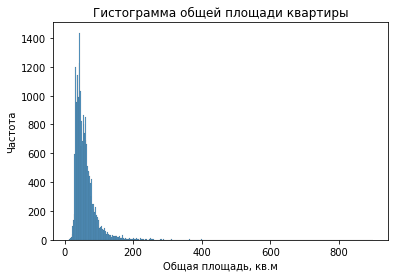

In [49]:
sns.histplot(df['total_area'])
plt.title('Гистограмма общей площади квартиры')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

The distribution is positive and similar to the Poisson distribution, where most values are concentrated at the beginning and there is a long tail - there are clearly highly outstanding values. It may indeed not be flats, but houses with large areas, which is also likely. Let's calculate the proportion of flats with the area less than 200 sqm.

In [50]:
print('Доля квартир с площадью меньше 200 кв.м составляет: {:.1%}'.format(df.query("total_area < 200").shape[0]/df.shape[0]))

Доля квартир с площадью меньше 200 кв.м составляет: 99.0%


As we can see, almost all flats are included in a reasonable footprint and adequate space allocation. Let's take a closer look at flats under 200 sqm.

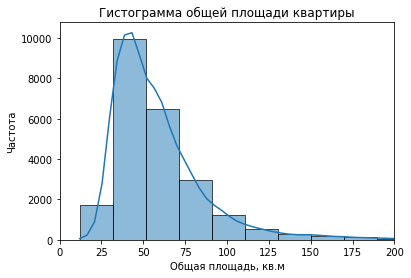

In [51]:
sns.histplot(df['total_area'], kde=True, bins=45)
plt.xlim(0, 200)
plt.title('Гистограмма общей площади квартиры')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

Most flats are between 40 and 60 square metres in size.

**Price**

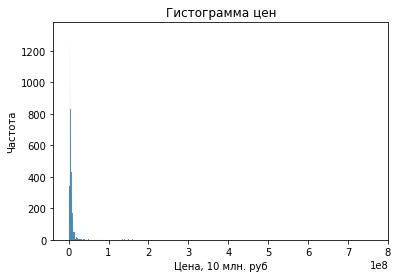

In [52]:
sns.histplot(df['last_price'])
plt.title('Гистограмма цен')
plt.xlabel('Цена, 10 млн. руб')
plt.ylabel('Частота')
plt.show()

We see a distinctive peak in the value of flats up to 15000000 million roubles and a long tail, indicating the presence of very expensive properties, although their share is not high. Let's calculate the share of flats priced up to 15 million roubles.

In [53]:
print('Доля квартир стоимостью менее 1 млн. рублей составляет: {:.1%}'.format(df.query("last_price < 15000000").shape[0]/df.shape[0]))

Доля квартир стоимостью менее 1 млн. рублей составляет: 94.7%


Let's analyse the flats in this price range, which make up the majority of properties.

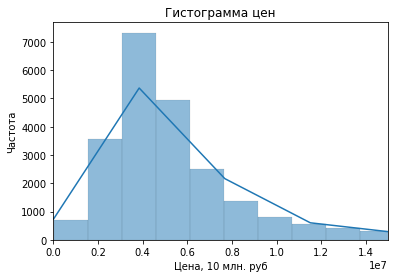

In [54]:
sns.histplot(df['last_price'], kde=True, bins=500)
plt.title('Гистограмма цен')
plt.xlabel('Цена, 10 млн. руб')
plt.ylabel('Частота')
plt.xlim(0,15000000)
plt.show()

Most of the flats are in the price range of 3 million to 6 million roubles.

**Number of rooms**

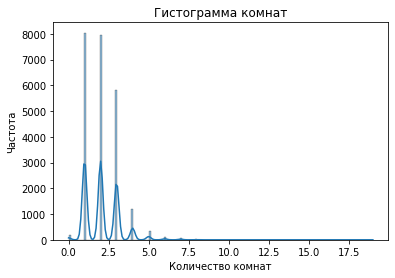

In [55]:
sns.histplot(df['rooms'], kde=True)
plt.title('Гистограмма комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

In [56]:
# finding max number of rooms
df.rooms.max() 

19

We see that the distribution is normal with three peaks at the beginning. Obviously these peaks are in the 1, 2 and 3 room flats. The long tail is in the minimum number of flats with particularly large numbers of rooms. Let's look at the distribution on a different scale.

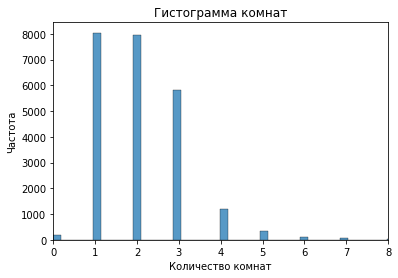

In [57]:
sns.histplot(df['rooms'], bins=100)
plt.title('Гистограмма комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.xlim(0,8)
plt.show()

The vast majority of the flats have one, two and three bedrooms. There are also flats with "0" number of rooms - studios. This is the expected distribution. It is exactly what we expected to see.

**Ceiling height**

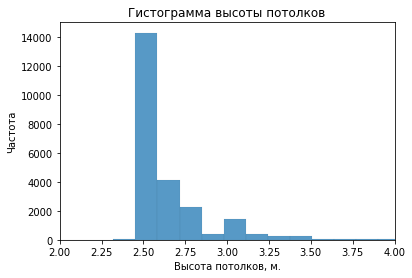

In [58]:
sns.histplot(df['ceiling_height'], kde=False, bins=750)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Частота')
plt.xlim(2,4)
plt.show()

The main peak at the standard ceiling height of 2.5 metres. Quite an expected distribution within the frame of common sense. Anomalous values above 5 metres are also present, and not even adequate, such as a maximum value of 100 metres. These are clearly outliers and will be handled further.

### Studying the duration of the flat being sold

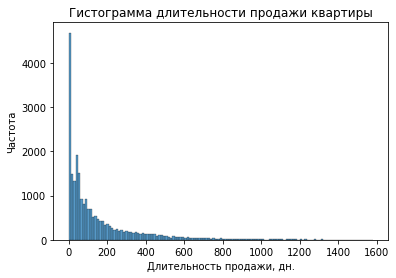

In [59]:
sns.histplot(df['days_exposition'])
plt.title('Гистограмма длительности продажи квартиры')
plt.xlabel('Длительность продажи, дн.')
plt.ylabel('Частота')
plt.show()

We can clearly see that the bulk of the flats are sold within 200 days, followed by a long tail that follows us through all the histograms. This tail most likely indicates long sales of very large flats with a very high number of rooms and houses. Let's change the scale of the histogram slightly.

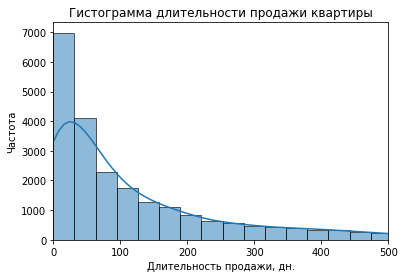

In [60]:
sns.histplot(df['days_exposition'], kde=True, bins=50)
plt.title('Гистограмма длительности продажи квартиры')
plt.xlabel('Длительность продажи, дн.')
plt.ylabel('Частота')
plt.xlim(0,500)
plt.show()

Obviously, the vast majority of sales occur in the first six months. Let's look at the basic descriptive statistics of sales duration using the `describe' method.

In [61]:
df.days_exposition.describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [62]:
# checking the proportion of sales with the duration between 1 and 500 days

len(df.query('0 < days_exposition < 500'))/len(df)*100

79.17633655428499

What is striking is the fact that there is a minimum of "0" days duration of the sale ads, and the fact of the sale is too long at 1580 days. The value "0" is a placeholder, indicating a lack of data, and the value of 1580 is clearly anamalous, and for the purity of the conclusions on the distribution of time of sale of flats, we will exclude these artifacts. And the maximum time of sale will limit to about 500 days, as the histograms show that in this time frame fits about 80% of sales.

In [63]:
df.query('0 < days_exposition < 500').days_exposition.describe()

count    18764.000000
mean       127.045726
std        119.120186
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

The average selling time is 127 days and the median is 84 days, which means that half of the flats sell faster than 84 days. The average value is quite different from the median value, indicating that even though we have limited our tail to 500, there is still a significant number of flats with a high selling time. Although these values are within the normal distribution boundaries, the average is still too high. 

One can also see that the sale of half of the flats is within an interval between 41 days and 181 days (between Q1 & Q3), which is almost 5 months. It can be assumed that flats selling faster than 41 days have been sold quite quickly, while flats selling longer than 181 days have been sold quite slowly.


### Removing rare and outlying values

During the initial analysis of the data and the plotting of histograms, we found a fair number of anomalous values. It is better to exclude these values in a further detailed analysis.

We will study the main parameters of the flats: area, price, number of rooms, height of ceilings and duration of sale.

In [64]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.666160,156.608844
std,35.654083,1.088701e+07,1.078405,0.995355,213.546873
min,12.000000,1.219000e+04,0.000000,1.000000,0.000000
25%,40.000000,3.400000e+06,1.000000,2.500000,22.000000
50%,52.000000,4.650000e+06,2.000000,2.500000,74.000000
75%,69.900000,6.800000e+06,3.000000,2.700000,199.000000
max,900.000000,7.630000e+08,19.000000,100.000000,1580.000000


At a glance, there are anomalies such as the maximum total area of 900 sq.m., maximum price 7630000 million rubles, the maximum number of rooms - 19, min. and max. ceiling height - 1m. and 100m. respectively, selling time of the flat - 0 days and 1580 days. 

These anomalies should be excluded in order to avoid distortions in the further analysis of the data.

For clarity of data distribution and visual perception of the range of normal data we will build a boxplot for each parameter. To precisely define the boxplot boundaries of the range of data normal distribution, we write a function defining the values of the left and right whiskers of the boxplot. 

In [65]:
def whiskers_lim(column):
    input_data = df[column].describe()
    
    # IQR calculation
    iqr = input_data[6] - input_data[4]
    
    # left and right whisker calculation     
    whisker_l = round(input_data[4] - 1.5 * iqr, 2)
    whisker_r = round(input_data[6] + 1.5 * iqr, 2)

    # if the left whisker is less than the minimum value, assign it the minimum value
    if whisker_l < input_data[3]: whisker_l = input_data[3] 
        
    # if the right whisker is greater than the maximum value, assign it the maximum value
    if whisker_r > input_data[7]: whisker_r = input_data[7]
        
    return whisker_l, whisker_r

Next, we will build and analyse boxplot for each of the above parameters, and based on the calculated data of the limits for the normal data distribution, we will exclude for each parameter values that fall outside these limits (outside the whiskers of the boxplot).  

**- total_area**

In [66]:
whiskers_lim('total_area') # calculating whiskers limits

(12.0, 114.75)

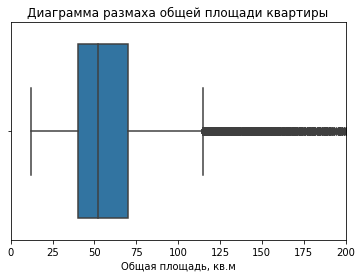

In [67]:
sns.boxplot(df['total_area'])
plt.title('Диаграмма размаха общей площади квартиры')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0,200)
plt.show()

We see that there are outliers, values greater than the right whisker merge into a thick black line. We exclude from the dataset the values outside the normal distribution (outside the whiskers of the boxplot).

In [68]:
print('Кол-во записей за пределами нормального распределения:', len(df.query('total_area>@whiskers_lim("total_area")[1]')))
print('Доля записей за пределами нормального распределения:', round(len(df.query('total_area>@whiskers_lim("total_area")[1]'))/len(df),2))

Кол-во записей за пределами нормального распределения: 1240
Доля записей за пределами нормального распределения: 0.05


**- last_price**

In [69]:
whiskers_lim('last_price') # calculating whiskers limits

(12190.0, 11900000.0)

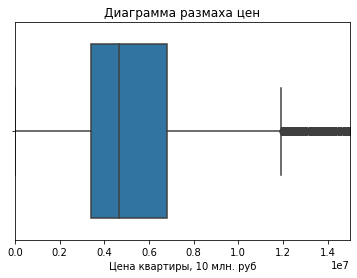

In [70]:
sns.boxplot(df['last_price'])
plt.title('Диаграмма размаха цен')
plt.xlabel('Цена квартиры, 10 млн. руб')
plt.xlim(0,15000000)
plt.show()

There are also outliers with inadequately high flat values, such as 7630000 million roubles. We exclude from the dataset the values outside the normal distribution (outside the boxplot whiskers).

In [71]:
print('Кол-во записей за пределами нормального распределения:', len(df.query('last_price>@whiskers_lim("last_price")[1]')))
print('Доля записей за пределами нормального распределения:', round(len(df.query('last_price>@whiskers_lim("last_price")[1]'))/len(df),2))

Кол-во записей за пределами нормального распределения: 2034
Доля записей за пределами нормального распределения: 0.09


**- rooms**

In [72]:
whiskers_lim('rooms') # calculating whiskers limits

(0.0, 6.0)

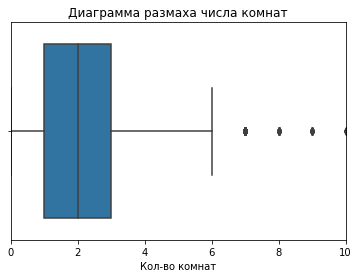

In [73]:
sns.boxplot(df['rooms'])
plt.title('Диаграмма размаха числа комнат')
plt.xlabel('Кол-во комнат')
plt.xlim(0,10)
plt.show()

There are also outliers with an inadequately high number of rooms, such as 19. We exclude from the dataset the values outside the normal distribution (outside the boxplot whiskers).

In [74]:
print('Кол-во записей за пределами нормального распределения:', len(df.query('rooms>@whiskers_lim("rooms")[1]')))
print('Доля записей за пределами нормального распределения:', round(len(df.query('rooms>@whiskers_lim("rooms")[1]'))/len(df),2))

Кол-во записей за пределами нормального распределения: 90
Доля записей за пределами нормального распределения: 0.0


**- ceiling_height**

In [75]:
whiskers_lim('ceiling_height') # calculating whiskers limits

(2.2, 3.0)

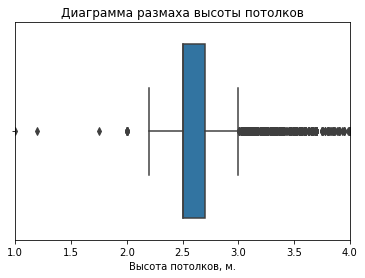

In [76]:
sns.boxplot(df['ceiling_height'])
plt.title('Диаграмма размаха высоты потолков')
plt.xlabel('Высота потолков, м.')
plt.xlim(1,4)
plt.show()

There are also outliers with inadequately high and low ceilings, such as 100 metres and 1 metre respectively. We exclude from the dataset the values outside the normal distribution (outside the boxplot whiskers).

In [77]:
print('Кол-во записей за пределами нормального распределения:', len(df.query('ceiling_height>@whiskers_lim("ceiling_height")[1]')))
print('Доля записей за пределами нормального распределения:', round(len(df.query('ceiling_height>@whiskers_lim("ceiling_height")[1]'))/len(df),2))

Кол-во записей за пределами нормального распределения: 1529
Доля записей за пределами нормального распределения: 0.06


**- days_exposition**

In [78]:
whiskers_lim('days_exposition') # calculating whiskers limits

(0.0, 464.5)

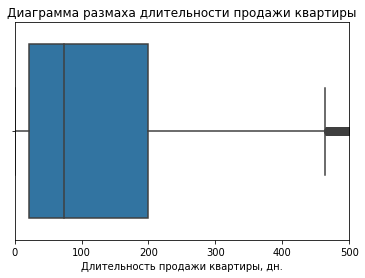

In [79]:
sns.boxplot(df['days_exposition'])
plt.title('Диаграмма размаха длительности продажи квартиры')
plt.xlabel('Длительность продажи квартиры, дн.')
plt.xlim(0,500)
plt.show()

There is a striking anomaly in the duration of the sale announcement: "0" days, as well as too long a sale period of 1,580 days. Let's exclude from the dataset the values outside the normal distribution (outside the whiskers of the boxplot). Our lower whisker is at value 0, but we remember that when processing the NaNs, we assigned a placeholder with value "0" to the rows with a missing value. However, the number of such records is rather large (3181 flats), we don't think it makes sense to exclude them when forming a normalized dataset. Especially since this parameter may not be needed for further analysis. Just will remember that zero in this column is a technical value.

In [80]:
print('Кол-во записей за пределами нормального распределения:', len(df.query('days_exposition>@whiskers_lim("days_exposition")[1]')))
print('Доля записей за пределами нормального распределения:', round(len(df.query('days_exposition>@whiskers_lim("days_exposition")[1]'))/len(df),2))

Кол-во записей за пределами нормального распределения: 2022
Доля записей за пределами нормального распределения: 0.09


**Will create a new dataset with normalised data**

In [81]:
# создаем новый датасет с нормализованными данными

df_normalized = df.query('total_area < @whiskers_lim("total_area")[1] and \
                         last_price < @whiskers_lim("last_price")[1] and \
                         rooms < @whiskers_lim("rooms")[1] and \
                         @whiskers_lim("ceiling_height")[0] < ceiling_height <= @whiskers_lim("ceiling_height")[1] and \
                         days_exposition < @whiskers_lim("days_exposition")[1]').reset_index(drop=True)


In [82]:
df_normalized[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,18970.000000,1.897000e+04,18970.000000,18970.000000,18970.000000
mean,51.625735,4.676555e+06,1.880021,2.581484,102.801371
std,17.042685,2.098984e+06,0.873184,0.128863,110.097804
min,12.000000,1.219000e+04,0.000000,2.250000,0.000000
25%,38.400000,3.253500e+06,1.000000,2.500000,20.000000
50%,48.000000,4.300000e+06,2.000000,2.500000,60.000000
75%,62.000000,5.750000e+06,3.000000,2.650000,150.000000
max,114.500000,1.188000e+07,5.000000,3.000000,464.000000


**Conclusion:**

Having examined the data, we can now determine the average characteristics of the flat for sale:

- total floor area - 51 sq.m;
- average price - 4,67 mln.rub;
- number of rooms - 2 rooms;
- ceiling height - 2,58 meters;

Anamalous values were excluded from further research, such as:
- flats with the area of more than 115 sq.m;
- flats with abnormally high price;
- flats with 6 or more rooms;
- flats with too low and too high ceilings;
- advertisements that have been posted for more than 465 days.


In [83]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18970 entries, 0 to 18969
Data columns (total 29 columns):
total_images            18970 non-null int64
last_price              18970 non-null int64
total_area              18970 non-null float64
first_day_exposition    18970 non-null datetime64[ns]
rooms                   18970 non-null int64
ceiling_height          18970 non-null float64
floors_total            18970 non-null int64
living_area             18970 non-null float64
floor                   18970 non-null int64
is_apartment            18970 non-null bool
studio                  18970 non-null bool
open_plan               18970 non-null bool
kitchen_area            18970 non-null float64
balcony                 18970 non-null int64
locality_name           18938 non-null object
airports_nearest        13979 non-null float64
citycenters_nearest     13990 non-null float64
parks_around3000        18970 non-null int64
parks_nearest           5533 non-null float64
ponds_around3000

### Assessing the various factors that influence the price of a flat

To assess and investigate the interdependence of the various factors on the price of the flat, we build a matrix of correlation coefficients reflecting the degree of dependence and influence between the selected parameters of the properties.

Using the method `.corr()` we derive correlation coefficients and find out which factors have the greatest impact on the price of the flat.

In [84]:
cor = df_normalized[['last_price', 'total_area',
       'rooms', 'citycenters_nearest', 'floor',
       'exposition_day', 'exposition_month', 'exposition_year',
       'floor_category']]
cor.corr()

,last_price,total_area,rooms,citycenters_nearest,floor,exposition_day,exposition_month,exposition_year
last_price,1.000000,0.679580,0.416548,-0.308115,0.172988,-0.010584,0.002593,0.035378
total_area,0.679580,1.000000,0.802405,-0.079533,-0.012854,-0.004321,0.008643,-0.033689
rooms,0.416548,0.802405,1.000000,-0.041820,-0.170881,0.002998,-0.004244,-0.015022
citycenters_nearest,-0.308115,-0.079533,-0.041820,1.000000,-0.036106,0.003214,-0.014334,0.007167
floor,0.172988,-0.012854,-0.170881,-0.036106,1.000000,0.007379,0.020333,-0.004898
exposition_day,-0.010584,-0.004321,0.002998,0.003214,0.007379,1.000000,0.013684,-0.011292
exposition_month,0.002593,0.008643,-0.004244,-0.014334,0.020333,0.013684,1.000000,-0.307125
exposition_year,0.035378,-0.033689,-0.015022,0.007167,-0.004898,-0.011292,-0.307125,1.000000


To make the matrix with the correlation values clearer and easier to understand, let's display the same values as a heat map by constructing a `heatmap'.

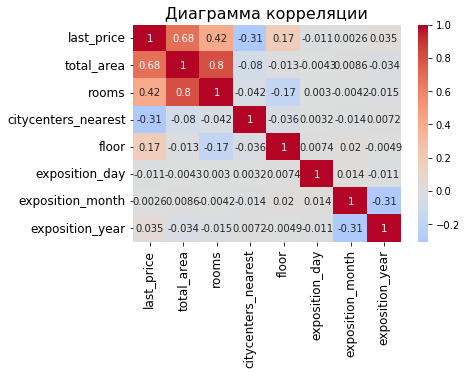

In [85]:
sns.heatmap(cor.corr(), xticklabels=cor.corr().columns, yticklabels=cor.corr().columns, cmap='coolwarm', center=0, annot=True)
plt.title('Диаграмма корреляции', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The heat map shows very clearly that the biggest factor affecting the price of a flat is the size of the flat, followed by the number of rooms. This conclusion is quite logical and expected, the bigger the property, the more expensive it is.

The next factor influencing the price is the distance to the city centre. Though the correlation coefficient is not very strong, the correlation coefficient is -0.3 (indicating an inverse relationship).

On the other hand, the correlation coefficients for price and time of listing (day, month, year) are all in the grey zone, indicating that there is no correlation. 

We also observe a very weak correlation between the price of the flat and the floor. We assume that flats on the ground floor and on the top floor are in less demand than flats on intermediate floors. Let us test this assumption by constructing a bar chart showing the impact of the floor on the price of the flat.

In [86]:
df_normalized.groupby('floor_category').price_per_square_m.mean().to_frame()

,price_per_square_m
floor_category,
другой,95524.119371
первый,77615.984538
последний,81941.552778


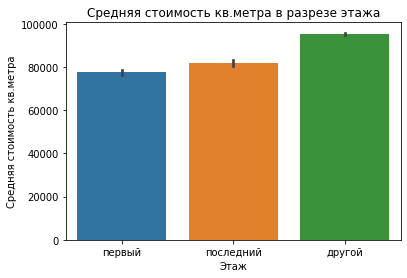

In [87]:
sns.barplot(data=df_normalized, x='floor_category', y='price_per_square_m', order = ["первый", "последний", "другой"])
plt.title('Средняя стоимость кв.метра в разрезе этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя стоимость кв.метра')
plt.show()

Indeed, the difference in price between the ground floor and the top floor is not so obvious. Both are inferior to flats on the other floors.

### Analysis of localities with the highest number of advertisements

Choose the 10 localities with the highest number of listings. Calculate the average price per square metre in these settlements. We will select the localities with the highest and lowest housing prices.

In [88]:
df_normalized.groupby('locality_name').price_per_square_m.agg(['count', 'mean'])\
.sort_values(by='count', ascending=False)\
.head(10)\
.style.format({'mean':'{:.2f}'})


,count,mean
locality_name,,
Санкт-Петербург,11845,105345.08
посёлок Мурино,481,85996.82
посёлок Шушары,410,78657.27
Всеволожск,352,67249.48
Колпино,306,75249.61
посёлок Парголово,306,90001.82
Пушкин,295,99859.77
Гатчина,271,68811.86
деревня Кудрово,263,92602.38


As might be expected, St. Petersburg tops the list of localities with the highest number of listings. And we can see that it accounts for more than half of the listings. All other listings are scattered across numerous other localities, and for all of them the gaps are not as apparent as between first and second place in terms of frequency.

Let's sort our grouping by price per square metre to analyse the localities with the most expensive properties.

In [89]:
df_normalized.groupby('locality_name').price_per_square_m.agg(['count', 'mean'])\
.sort_values(by='mean', ascending=False)\
.head(10)\
.style.format({'mean':'{:.2f}'})


,count,mean
locality_name,,
посёлок Лисий Нос,1,168706.00
Санкт-Петербург,11845,105345.08
Зеленогорск,21,102890.19
Сестрорецк,144,102069.53
деревня Мистолово,10,100331.00
Кудрово,165,99884.49
Пушкин,295,99859.77
посёлок Левашово,1,96997.00
посёлок Репино,1,92727.00


Here the leader has already changed. It is the village of Lisi Nos. However, there was only one advertisement for a flat for sale. But, apparently, luxury housing was offered for sale at a very expensive price. The next settlements behind Lisy Nos are 6 villages, approximately in the same price category of 99,000 to 105,000 roubles per sq.m. 

### Analysis of flat prices based on their distance to the city centre

Will calculate the distance to the centre for each property in kilometres and will add the corresponding column to the original dataset. Then will update this column to a normalized dataset with good data. From the normalized dataset, we'll select a slice for St. Petersburg.

In [90]:
# Create a column with the distance to the centre in kilometres: round it up to whole numbers.

df['citycenter_km'] = (df['citycenters_nearest'] / 1000).round(0).astype('int', errors='ignore')

# update a normalised dataset with a new added column

df_normalized = df.query('total_area < @whiskers_lim("total_area")[1] and \
                         last_price < @whiskers_lim("last_price")[1] and \
                         rooms < @whiskers_lim("rooms")[1] and \
                         @whiskers_lim("ceiling_height")[0] < ceiling_height <= @whiskers_lim("ceiling_height")[1] and \
                         days_exposition < @whiskers_lim("days_exposition")[1]').reset_index(drop=True)

# select a slice with flats in St Petersburg

spb = df_normalized.query('locality_name == "Санкт-Петербург"')

In [91]:
spb_grouped = spb.groupby('citycenter_km').last_price.mean().round().to_frame()
spb_grouped.head(10)

,last_price
citycenter_km,
0.0,6466667.0
1.0,7691468.0
2.0,7701698.0
3.0,7214552.0
4.0,7174785.0
5.0,7389387.0
6.0,6871950.0
7.0,6518122.0
8.0,6342428.0


Plot a line graph of the price against distance to the centre.

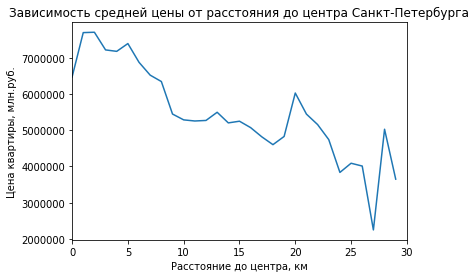

In [92]:
sns.lineplot(x=spb_grouped.index, y='last_price', data=spb_grouped)
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена квартиры, млн.руб.')
plt.xlabel('Расстояние до центра, км')
plt.xlim(0,30)
plt.show()

The graph in confirmation of the grouping table shows that within a radius of 5 km the price starts to decrease sharply. We assume that 5km is the main city centre. Further decreasing, the price stabilises around 8 km and up to about 18 km the graph represents a plateau with approximately the same price, irrespective of the distance to the centre. Apparently this is where we reach the city boundaries, where a local spike follows - most likely represented by a suburban village with luxury real estate. And then again there is a sharp price slide - apparently we have moved out of the city and into the region.

An area within a 5km radius of the city centre is defined as the city centre.

### Analysis of flats in the centre. Study of parameters: area, price, number of rooms, ceiling height

Will select a segment of flats in the centre of St. Petersburg. We will analyze this area and study such parameters as: area, price, number of rooms, ceiling height. 

Also will analyze the factors that affect the price of the flat: the number of rooms, the floor, the distance from the centre, the date of advertising.

Previously, we have separated all flats located in St. Petersburg into a separate slice. Now we will select a sample of flats located within a 5 km radius of the centre. This will be our segment of flats in the centre.

In [93]:
spb_city_center = spb.query('citycenter_km < 5')

Let us analyse the basic parameters of the flats located in the city centre and compare them with the overall flat base of the city and the region in order to find out if there are any differences.

In [94]:
# descriptive characteristics of flats in the centre

spb_city_center[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,543.000000,5.430000e+02,543.000000,543.000000,543.000000
mean,65.516483,7.308861e+06,2.360958,2.655654,110.285451
std,21.122997,2.107585e+06,0.936402,0.200333,115.630270
min,12.000000,1.600000e+06,0.000000,2.400000,0.000000
25%,49.500000,5.700000e+06,2.000000,2.500000,20.000000
50%,64.500000,7.300000e+06,2.000000,2.500000,73.000000
75%,80.000000,8.830000e+06,3.000000,2.820000,163.500000
max,114.200000,1.180000e+07,5.000000,3.000000,462.000000


In [95]:
# descriptive characteristics of flats in the overall database

df_normalized[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,18970.000000,1.897000e+04,18970.000000,18970.000000,18970.000000
mean,51.625735,4.676555e+06,1.880021,2.581484,102.801371
std,17.042685,2.098984e+06,0.873184,0.128863,110.097804
min,12.000000,1.219000e+04,0.000000,2.250000,0.000000
25%,38.400000,3.253500e+06,1.000000,2.500000,20.000000
50%,48.000000,4.300000e+06,2.000000,2.500000,60.000000
75%,62.000000,5.750000e+06,3.000000,2.650000,150.000000
max,114.500000,1.188000e+07,5.000000,3.000000,464.000000


Immediately obvious is the fact that the average area of flats in the city centre is higher than the area of flats in the general base - by about 27%.

The average price of flats in the city centre is considerably higher than the average price in overall database - practically by 56%.

Other features such as number of rooms and ceiling heights are practically comparable. There is no particular difference here. 

In order to assess and investigate the interdependence of the various factors on the price of the flat, we build a matrix of correlation coefficients, reflecting the degree of dependence and influence between the selected parameters of the properties.

For greater clarity and easier perception of the matrix with the correlation values, let us display the same values in the form of a heat map by constructing a `heatmap'.

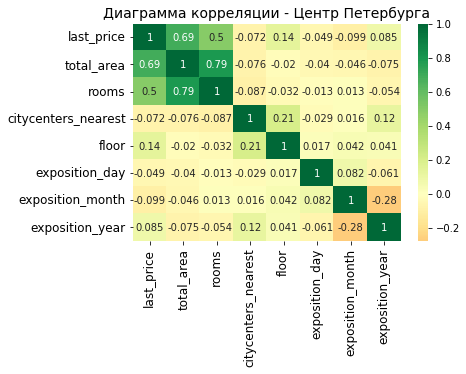

In [96]:
cor_spb_city_center = spb_city_center[['last_price', 'total_area',
       'rooms', 'citycenters_nearest', 'floor',
       'exposition_day', 'exposition_month', 'exposition_year']]

sns.heatmap(cor_spb_city_center.corr(), xticklabels=cor_spb_city_center.corr().columns, yticklabels=cor_spb_city_center.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Диаграмма корреляции - Центр Петербурга', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In order to compare the conclusions, below we duplicate a similar heat map with coefficients on the overall flat database.

The heat map shows very clearly that the biggest factor influencing the price of a flat is the area of the flat, followed by the number of rooms. This conclusion is quite logical and to be expected - the bigger the property, the more expensive it is. And in the centre the dependence on the number of rooms exceeds similar correlation on the overall database.

Remoteness from the centre, of course, is not expressed as we already analyze the centre itself. In the overall database this correlation is slightly more pronounced, but also weak (-0.31).

The correlation coefficients for price and time of placement (day, month, year) for St. Petersburg and the overall database are all in the yellow and grey zones, indicating the absence of correlation.

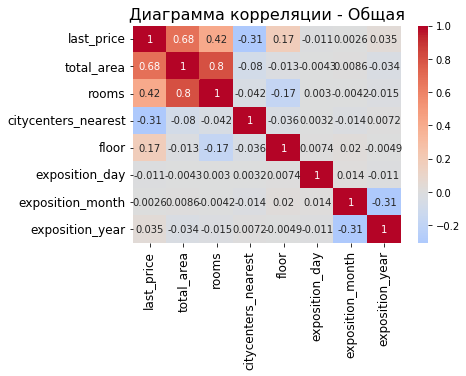

In [97]:
sns.heatmap(cor.corr(), xticklabels=cor.corr().columns, yticklabels=cor.corr().columns, cmap='coolwarm', center=0, annot=True)
plt.title('Диаграмма корреляции - Общая', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Let's analyse the user's ad activity by days of the week, month and year of publication.

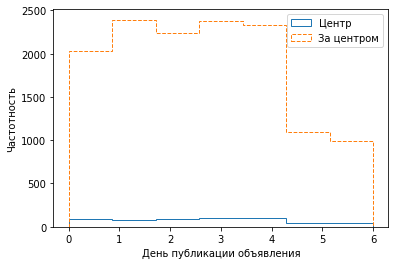

In [98]:
ax = spb_city_center.plot(kind='hist', y='exposition_day', histtype='step', bins=7, label='Центр')

df_normalized.query('citycenter_km >= 5')\
.plot(kind='hist', y='exposition_day', histtype='step', bins=7, ax=ax, label='За центром', linestyle='dashed')
plt.xlabel('День публикации объявления')
plt.ylabel('Частотность')

plt.show()

Most of the listings are placed on weekdays, and there is a noticeable drop off at weekends. Apparently, during working hours people are busy selling their own properties, while the weekend is a legitimate day off :) 

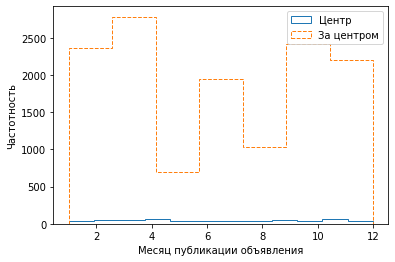

In [99]:
ax = spb_city_center.plot(kind='hist', y='exposition_month', histtype='step', bins=12, label='Центр')

df_normalized.query('citycenter_km >= 5')\
.plot(kind='hist', y='exposition_month', histtype='step', bins=7, ax=ax, label='За центром', linestyle='dashed')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Частотность')

plt.show()

Again, there is a pronounced seasonality in ad placements. The highest activity is in autumn, winter and until mid-spring. Then there is a drop in May holidays, a small local peak in June-July, and another drop during the holiday season in August.

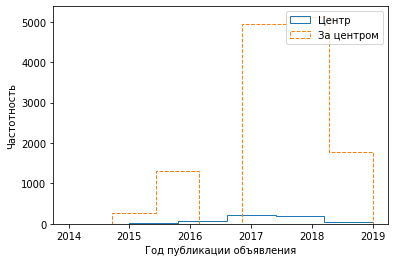

In [100]:
ax = spb_city_center.plot(kind='hist', y='exposition_year', histtype='step', bins=5, label='Центр')

df_normalized.query('citycenter_km >= 5')\
.plot(kind='hist', y='exposition_year', histtype='step', bins=7, ax=ax, label='За центром', linestyle='dashed')
plt.xlabel('Год публикации объявления')
plt.ylabel('Частотность')

plt.show()

The main flow of advertisements is from 2017 to 2019. 

### Exploratory analysis. Conclusion:


1. As a result of exploratory data analysis, the dataset has been checked for outliers. By sequentially examining the parameters area, price, number of rooms, ceiling height, sales duration, multiple outliers in the values were detected. It was decided to reduce the dataset to get rid of the outlier values.


2. As a result of data cleaning and elimination of outliers, 5,426 rows were removed, which is only 23% of the 
dataset.


3. Conclusions from the study:
    - Half of all flats are sold between 21 and 149 days.
    - In assessing the correlation, the most important factors interdependent on price were identified. The most important of which relate directly to property characteristics such as living space and number of rooms, followed by distance to the city centre. And the dependence of the price on the time of posting has not been detected.
    - Additionally, we have found out that the closer the flat is to the centre, the more expensive it is. Flats on the top floor of a building are slightly more expensive than those on the ground floor. However, both the top floor and the ground floor are inferior in price to flats on intermediate floors.
    - As was to be expected, St Petersburg tops the list of localities with the highest number of listings (11310). And we see that it accounts for more than half of all listings. All other listings are scattered across numerous other localities, and for all of them the gaps are not as pronounced as between first and second place in terms of frequency.
    - However, the leader in terms of price per square metre has changed. It is the settlement of Lisi Nos. However, there is only one advertisement for a flat for sale. Apparently elite housing was offered for sale at a very high price. After Lisi Nos are located Saint-Petersburg and 5 other settlements, approximately in an equal price category from 99000 to 105000 rubles per sq. m. (Sankt-Petersburg, Sestroretsk, Mistolovo, Zelenogorsk, Kudrovo, Pushkin).
    - The centre of St. Petersburg has been conventionally defined for the study - within a radius of five kilometres from the centre. We have confirmed the obvious fact that the average price of flats in the city centre is significantly higher than in the general database - by almost 58%, and the average area of flats in the centre is higher than in the general database - by about 25%.
    - Other features such as number of rooms and ceiling heights are practically comparable. There is no particular difference here.



## Overall conclusion

1. Data with real estate price information has been downloaded, cleaned, categorised and analysed.
2. In the resulting data, anomalous values as well as multiple missing values were detected, especially a very high percentage of missing values in the cartographic data on distances to different objects, which are automatically collected.
3. As a result of the study, the dataset is cleared of missing values, outliers and artefacts. The analysis shows that:

    - The total area of most flats is in the 40-60 sq.m. range
    - the most popular are 1 and 2-bedroom flats
    - ground floor flats are cheaper than ground floor flats. At the same time, ground floor and top floor flats are cheaper than flats on intermediate floors
    - the most expensive flats are located in the city centre (within a radius of 5 km. from the centre). And consequently the further from the centre the cheaper.
    
**BUG REPORT:** 

When analysing the dataset for completeness and quality of available data, we found a significant number of missing values, especially cartographic data, such as distances to the nearest park (15620 missing values / 65.91% of total data), to the nearest pond (14589 / 61.56%), to the nearest airport ( 5542 / 23.38%) and to the city centre (5519 / 23.29%). There is also a high proportion of missing values for the availability of parks and ponds within a 3km radius. 

The data from the listed columns are obtained automatically with the help of a cartographic service. Their absence is therefore alarming and suggests possible technical malfunction. It's necessary to pay attention to this problem and take measures to fix it.  

In addition, it is necessary to analyze the process of user data entry for their validation when filling out ads, in order to avoid entering obviously inadequate and abnormal values, such as ceiling height of 100 meters and the number of rooms - 19.
